## <p style='text-align: center; font-family: "Times new Roman" ' > AdaBoost Sentiment Classification Data-1 V1  </p> 


## <span style="color: Navy"> Table des matières </span> 
##### 1.[Introduction](#.-Introduction)

##### 2.[Collecte des données](#.-Collecte_des_données)

##### 3.[Prétraitement](#.-Prétraitement)

##### 4.[Construction du modèle](#.-Construction_du_modèle)

##### 5.[Evaluation du modèle ](#.-Evaluation_du_modèle)



## <span style="color: Navy"> 1.Intorduction </span> 

<div style="text-align:center;">
<img src="images/Le flux de travail général de l'analyse des sentiments.png" alt="Analyse des sentiments: Processus" width="400" height="200">
</div>

***

Dans cette étude, notre objectif est de développer un modèle de NLP capable d'analyser les sentiments exprimés dans les tweets. nous utilisons un ensemble de données contenant des tweets pré-étiquetés avec leurs sentiments correspondants.


- L'ensemble de données comprend les colonnes suivantes:

<span Style="color:MediumBlue"> **Target:** </span>  : Cette colonne représente la polarité du sentiment exprimé dans le tweet, avec des valeurs de 0 pour les sentiments négatifs et 4 pour les sentiments positifs.

<span Style="color:MediumBlue"> **ids:** </span> : Chaque tweet est associé à un identifiant unique.

<span Style="color:MediumBlue"> **Date:** </span>  La date et l'heure de publication du tweet.

<span Style="color:MediumBlue"> **Flag** </span>  Un marqueur spécifiant l'origine des données, indiquant si les données proviennent d'une requête spécifique ou non.

<span Style="color:MediumBlue"> **user** </span>  Le nom d'utilisateur de l'auteur du tweet.

<span Style="color:MediumBlue"> **Text** </span>  Le contenu textuel du tweet exprimant le sentiment.

 ## <span style="color:Navy"> 2. Collecte des données </span>

****

<span style="color: DimGray"> **1.1 Importation des bibliothèques**  </span>

In [28]:
import pandas as pd 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
import nltk
from nltk.stem import WordNetLemmatizer
import pickle


<span Style="color: DimGray"> **1.2 Importation des données**</span> 

In [2]:
colonnes= ['Target', 'ids', 'date', 'flag', 'user', 'text']
df = pd.read_csv('Datasets/Tweets.csv', encoding='ISO-8859-1', names=colonnes)

In [3]:
df.head()

,Target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


<span style="color:DimGray"> **1.3 exploration des données**</span>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   Target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [5]:
df.isnull().sum()

Target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64

## <span style="color:Navy"> 3. Prétraitement</span>

***

<span style="color:DimGray"> **3.1 Suppression des colonnes non-utiles** </span>

In [6]:
# On va garder les colonnes : Target, id, text
df= df[['Target', 'ids' ,'text']]
df

,Target,ids,text
0,0,1467810369,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,is upset that he can't update his Facebook by ...
2,0,1467810917,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,my whole body feels itchy and like its on fire
4,0,1467811193,"@nationwideclass no, it's not behaving at all...."
...,...,...,...
1599995,4,2193601966,Just woke up. Having no school is the best fee...
1599996,4,2193601969,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Happy 38th Birthday to my boo of alll time!!! ...


 <span style="color: DimGray"> **3.2 Covertion de Target 4 à 1**  </span> 

In [7]:
df.loc[df['Target']== 4, 'Target']=1
df.Target.unique()

array([0, 1], dtype=int64)

<span style="color: DimGray"> **3.3 Visualisation des données ( La distribution des classes)** </span> 

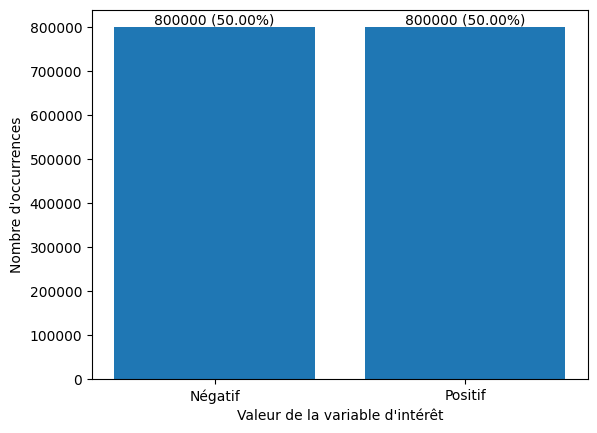

In [8]:
target_counts = df['Target'].value_counts()

# Calcul du proportion pour chaque valeur de la variable d'intérêt (Target)
target_proportions = df['Target'].value_counts(normalize=True)

# Création d'un graphique à barres pour visualiser la distribution
plt.bar(target_counts.index, target_counts.values)

# Ajoute des étiquettes des barres (nombre d'occurrences et proportion)
for i, count in enumerate(target_counts):
    proportion = target_proportions[i]
    plt.text(i, count, f"{count} ({proportion:.2%})", ha='center', va='bottom')

# Étiquetage de l'axe des x et y
plt.xlabel('Valeur de la variable d\'intérêt')
plt.ylabel('Nombre d\'occurrences')

# Ajoute d'une légende aux barres
plt.xticks(target_counts.index, ['Négatif', 'Positif'])

# Affichage du graphique
plt.show()

<span style="color:DimGray"> **3.4 Tokenisation** </span> 

In [9]:
import re 
import nltk 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [10]:
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
def clean_text(text):
    # Suppression des caractères spéciaux et de la ponctuation
    text = re.sub(r"[^\w\s]", "", text)
    
    # Conversion en minuscules
    text = text.lower()
    
    # Tokenisation du texte
    tokens = word_tokenize(text)
    
    # Suppression des mots vides
    stop_words = set(stopwords.words("english"))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Joindre les tokens en une seule chaîne
    cleaned_text = ' '.join(tokens)
    
    return cleaned_text


# On appliquer le nettoyage du texte sur la colonne 'texte'
df['texte_nettoye'] = df['text'].apply(clean_text)

In [12]:
df.head()

,Target,ids,text,texte_nettoye
0,0,1467810369,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot httptwitpiccom2y1zl awww thats bumm...
1,0,1467810672,is upset that he can't update his Facebook by ...,upset cant update facebook texting might cry r...
2,0,1467810917,@Kenichan I dived many times for the ball. Man...,kenichan dived many times ball managed save 50...
3,0,1467811184,my whole body feels itchy and like its on fire,whole body feels itchy like fire
4,0,1467811193,"@nationwideclass no, it's not behaving at all....",nationwideclass behaving im mad cant see


<span style='color:DimGray'> **3.5 Visualisation** </spand>

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 

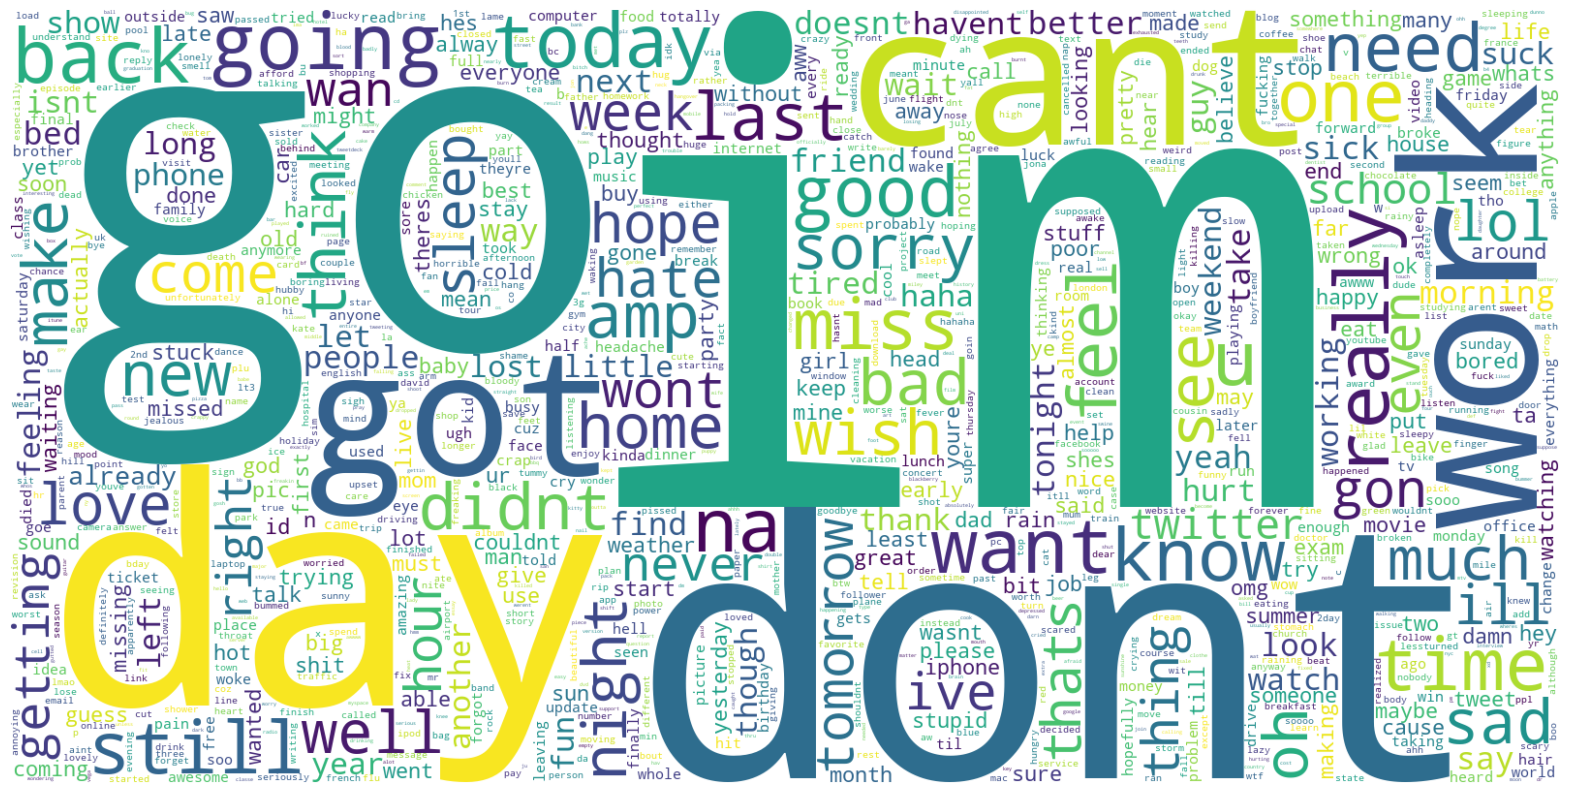

In [14]:
#filtrage des tweets Negatif 
data_neg= df[df['Target'] == 0]['texte_nettoye']

#Création d'un nuage de mots  
wc = WordCloud(max_words = 1000, width=1600, height = 800, collocations= False, background_color='white').generate("".join(data_neg))

#affichage 
plt.figure(figsize=(20, 20))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

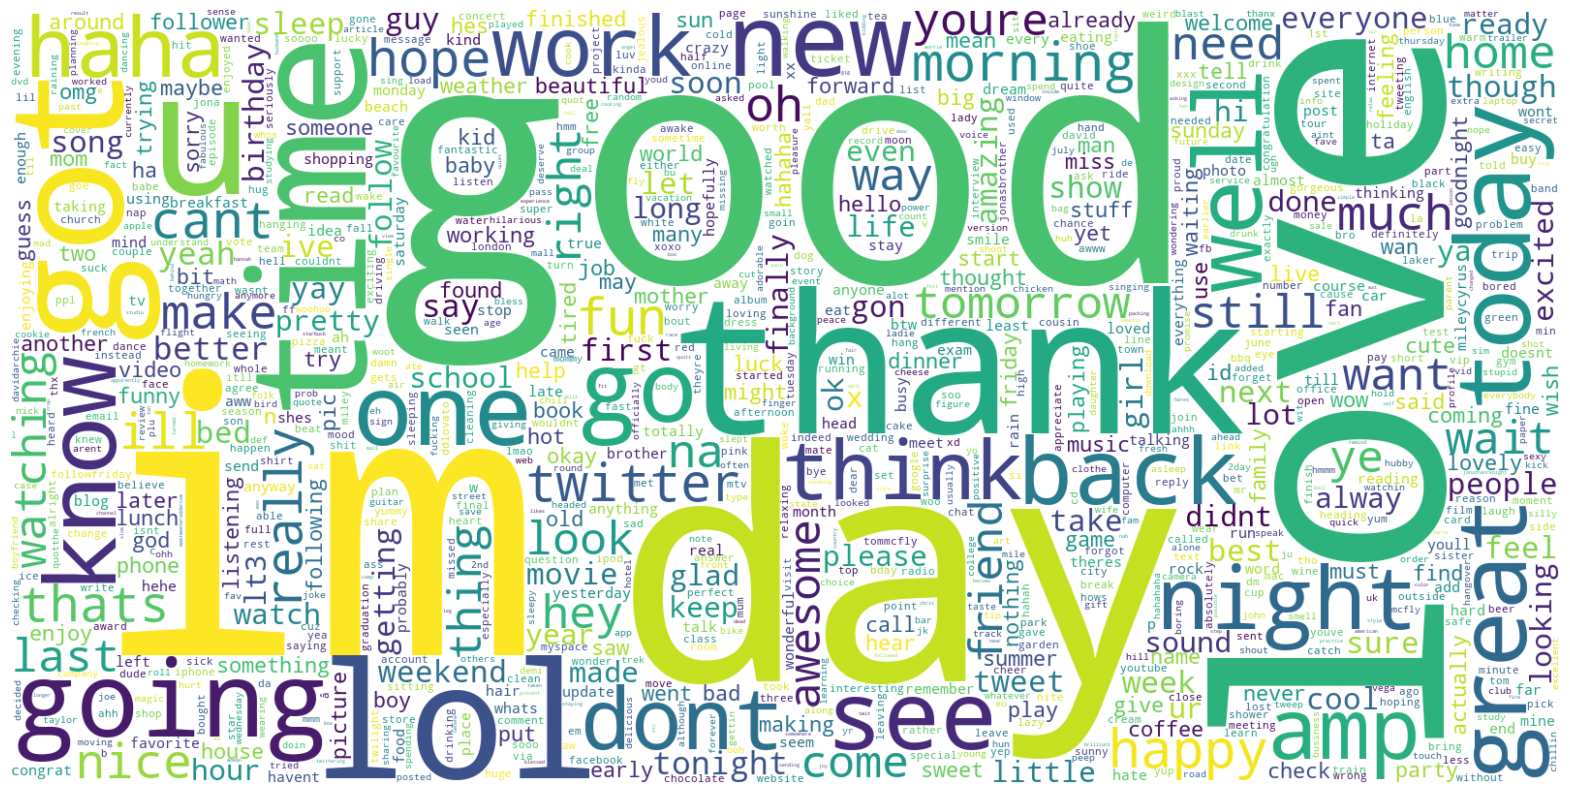

In [15]:
#filtrage des tweets posifit
data_neg = df[df['Target'] == 1]['texte_nettoye']

# Créer un nuage de mots à partir des données négatives
wc = WordCloud(max_words=1000, width=1600, height=800, collocations=False, background_color='white').generate(" ".join(data_neg))

# Afficher le nuage de mots
plt.figure(figsize=(20, 20))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

<span style='color:DimGray'> **3.6 Modélisation** </spand>

* Séparation des données

In [16]:
X=df['texte_nettoye'].values
Y=df['Target'].values

**X:** Représente la variable indépendante

**Y:** Représente la variable dépendante

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

<span style='color:DimGray'> **3.7 Convertion du texte en numérique** </spand>

In [18]:
vectorizer= TfidfVectorizer()
X_train=vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)

 ## <span style='color:Navy'> 4.Construction du  modèle </span>

****

### adaboost

In [19]:
from sklearn.ensemble import AdaBoostClassifier
AdaBoost = AdaBoostClassifier(n_estimators=60, random_state=42,learning_rate=1)
AdaBoost.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=60, random_state=42)

## <span style='color:Navy'> 5.Evaluation du modèle </span>

****

<span style='color:DimGray'> **5.1 Matrice de confusion et Rapport de classification** </span>

### AdaBoost 

In [22]:
#adaboost
predicted = AdaBoost.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)

print('accuracy: ',str('{:04.2f}'.format(accuracy_score*100))+'%')
print('------------------------------------------------')
print('Matrice de confusion:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------')
print('Rapport de classification')
print(classification_report(y_test, predicted))

accuracy:  67.58%
------------------------------------------------
Matrice de confusion:
       0       1
0  76099   83901
1  19847  140153
------------------------
Rapport de classification
              precision    recall  f1-score   support

           0       0.79      0.48      0.59    160000
           1       0.63      0.88      0.73    160000

    accuracy                           0.68    320000
   macro avg       0.71      0.68      0.66    320000
weighted avg       0.71      0.68      0.66    320000



## <span style='color:Navy'> Prédiction  </span>

****

* Positif

In [ ]:
# Text
text = "i'm happy"


# Appliquer la fonction de racinisation à la nouvelle observation
lemmatized_new_text = lemmatizer(text)

#Conversion du text
vectorized_new_text = vectorizer.transform([lemmatized_new_text])

# Prédiction
prediction = model.predict(vectorized_new_text)

# Affichage des résultats
if prediction == 0:
    print("Sentiment est: négatif 😢.")
else:
    print("Sentiment est:  positif 😀.")

* Négatif

In [ ]:
# Text
text = "it's an exhausting day!"

# On applique la fonction de racinisation à la nouvelle observation
lemmatized_new_text = lemmitizer(text)

#Conversion du text
vectorized_new_text = vectorizer.transform([lemmatized_new_text])

# Prédiction
prediction = model.predict(vectorized_new_text)

# Affichage des résultats
if prediction == 0:
    print("Sentiment est: négatif 😢.")
else:
    print("Sentiment est:  positif 😀 .")